# Tugas Pendahuluan
Tugas Pendahuluan dikerjakan dengan dataset titanic yang dapat didownload pada link [berikut](https://drive.google.com/file/d/16j_9FEHLjh_Y_3CdUtp9M13VwImyT89T/view?usp=sharing). Lakukan prediksi apakah suatu penumpang selamat atau tidak (kolom **survived**), bernilai 0 jika tidak selamat, dan 1 jika selamat.

<br>
Tugas dikerjakan secara berkelompok, dengan 1 kelompok terdiri atas 2 mahasiswa. Waktu pengerjaan dari 28 Maret 2022 - 3 April 2022 pukul 23.59.

# 0. Loading Data and Library

In [106]:
# Put your library here

import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_validate, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [68]:
# Read data here

# Load titanic dataset
df_raw = pd.read_csv("titanic_dataset.csv")
df = df_raw.copy()

In [69]:
df

,index,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3.0,1.0,"Abelseth, Miss. Karen Marie",female,16.0,0.0,0.0,348125,7.6500,NaN,S
1,1,3.0,0.0,"Burns, Miss. Mary Delia",female,18.0,0.0,0.0,330963,7.8792,NaN,Q
2,2,1.0,1.0,"Fortune, Miss. Alice Elizabeth",female,24.0,3.0,2.0,19950,263.0000,C23 C25 C27,S
3,3,3.0,1.0,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1.0,0.0,345572,17.4000,NaN,S
4,4,3.0,0.0,"Jonsson, Mr. Nils Hilding",male,27.0,0.0,0.0,350408,7.8542,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1304,3.0,1.0,"Dahl, Mr. Karl Edwart",male,45.0,0.0,0.0,7598,8.0500,NaN,S
1305,1305,1.0,0.0,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1.0,0.0,PC 17758,108.9000,C65,C
1306,1306,2.0,1.0,"Becker, Miss. Ruth Elizabeth",female,12.0,2.0,1.0,230136,39.0000,F4,S
1307,1307,3.0,1.0,"Murphy, Miss. Katherine ""Kate""",female,NaN,1.0,0.0,367230,15.5000,NaN,Q


In [70]:
df.dtypes

index         int64
pclass      float64
survived    float64
name         object
sex          object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [71]:
df.iloc[5]

index                                   5
pclass                                1.0
survived                              1.0
name        Chambers, Mr. Norman Campbell
sex                                  male
age                                  27.0
sibsp                                 1.0
parch                                 0.0
ticket                             113806
fare                                 53.1
cabin                                  E8
embarked                                S
Name: 5, dtype: object

# I. Data Understanding
Tujuan dari bagian ini adalah peserta dapat memahami kualitas dari data yang diberikan. Hal ini meliputi:
1. Ukuran data
2. Statistik dari tiap fitur
3. Pencilan (outlier)
4. Korelasi
5. Distribusi 

## I.1 
Carilah:
1. Ukuran dari data (instances dan features)




In [72]:
print("Banyaknya instances yaitu", df.shape[0])
print("Banyaknya features yaitu", df.loc[:, df.columns!='survived'].shape[1])

Banyaknya instances yaitu 1309
Banyaknya features yaitu 11


2. Tipe dari tiap-tiap fitur 

    1. Categorical
        - pclass : ordinal
        - sex
        - embarked
    2. Numeric
        - age : continuous
        - fare : continuous
        - sibsp : discrete
        - parch : discrete
    3. Lainnya
        - ticket
        - cabin
        - name
        - index

3. Banyaknya unique values dari fitur yang bertipe kategorikal

In [73]:
print("Banyaknya Unique Values dari pclass yaitu", len(pd.unique(df['pclass'])))
print("Banyaknya Unique Values dari sex yaitu", len(pd.unique(df['sex'])))
print("Banyaknya Unique Values dari embarked yaitu", len(pd.unique(df['embarked'])))

Banyaknya Unique Values dari pclass yaitu 3
Banyaknya Unique Values dari sex yaitu 2
Banyaknya Unique Values dari embarked yaitu 4


4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur yang tidak bertipe kategorikal

In [74]:
df[['age','fare','sibsp','parch']].describe()

,age,fare,sibsp,parch
count,1046.000000,1308.000000,1309.000000,1309.000000
mean,29.881135,33.295479,0.498854,0.385027
std,14.413500,51.758668,1.041658,0.865560
min,0.166700,0.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,39.000000,31.275000,1.000000,0.000000
max,80.000000,512.329200,8.000000,9.000000


## I.2
Carilah:
1. Missing values dari tiap fitur
2. Outliers dari tiap fitur (gunakan metode yang kalian ketahui)

In [75]:
# I.2 Put your code here

print("1. Missing values dari tiap fitur\n")

for column in df.columns[1:]:
    if (column != "survived"):
        print("• "+column+str(": ")+str(len(df[df[column].isna()])))

print("\n", df[df.isna().any(axis=1)])

print("\n\n2. Outliers dari tiap fitur")

for column in df.columns[1:]:
    if (is_numeric_dtype(df[column]) and column != "survived"):
        print("\n• "+column+str(":"))
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3-q1
        lower_bound = q1-1.5*iqr
        upper_bound = q3+1.5*iqr
        outliers = df.loc[(df[column]<lower_bound) | (df[column]>upper_bound)]
        print("\t- Lower bound: "+str(lower_bound))
        print("\t- Upper bound: "+str(upper_bound)+"\n")
        if (len(outliers) == 0):
            print("\t  No outliers")
        else:
            print(str(outliers))
            print("Jumlah: "+str(len(outliers)))

1. Missing values dari tiap fitur

• pclass: 0
• name: 0
• sex: 0
• age: 263
• sibsp: 0
• parch: 0
• ticket: 0
• fare: 1
• cabin: 1014
• embarked: 2

       index  pclass  survived                                          name  \
0         0     3.0       1.0                   Abelseth, Miss. Karen Marie   
1         1     3.0       0.0                       Burns, Miss. Mary Delia   
3         3     3.0       1.0  de Messemaeker, Mrs. Guillaume Joseph (Emma)   
4         4     3.0       0.0                     Jonsson, Mr. Nils Hilding   
6         6     2.0       0.0                           Enander, Mr. Ingvar   
...     ...     ...       ...                                           ...   
1301   1301     3.0       0.0              Gronnestad, Mr. Daniel Danielsen   
1302   1302     3.0       1.0                     Madsen, Mr. Fridtjof Arne   
1304   1304     3.0       1.0                         Dahl, Mr. Karl Edwart   
1307   1307     3.0       1.0                Murphy, Miss. 

Age yang NaN dapat diisi dengan age rata-rata. Fare yang NaN dapat diisi dengan fare rata-rata untuk kelas tiket bersangkutan (kelas tiket ditandai oleh fitur pclass). Embarked yang kosong dapat diisi dengan port frekuensi tertinggi pada fitur embarked.

Age yang outliers masih berada dalam rentang umur wajar bagi manusia, maka tidak akan dianggap outlier, karena data kemungkinan besar betul. SibSp yang outliers masih berada dalam rentang wajar. Pada kasus ekstrim SibSp bernilai 8 dapat mengindikasikan 8 saudara, atau 7 saudara dan 1 suami atau istri. Sebagai contoh adalah Stella Anne Sage (https://www.encyclopedia-titanica.org/titanic-victim/stella-anne-sage.html). ParCh yang outliers juga masih berada dalam rentang wajar. Data dianggap outlier karena mayoritas nilai ParCh adalah 0. Fare yang outliers dapat diteliti ulang berdasarkan sumber berikut (https://lisbdnet.com/how-much-did-tickets-cost-for-the-titanic/). Melihat nilai maksimum fare dalam data adalah £512 dan harga tiket first class diestimasi £870, serta tidak ada nilai fare yang negatif, maka data fare dapat dianggap benar. Untuk menangani dampak nilai ekstrim pada data kontinu fare, dapat dilakukan scaling/normalisasi.

## I.3
Carilah:
1. Korelasi antar fitur

In [76]:
df.corr()

,index,pclass,survived,age,sibsp,parch,fare
index,1.000000,-0.003466,0.002967,-0.003376,-0.015501,-0.013538,-0.022424
pclass,-0.003466,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629
survived,0.002967,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265
age,-0.003376,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739
sibsp,-0.015501,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238
parch,-0.013538,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539
fare,-0.022424,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000


Dapat dilihat bahwa fitur yang memiliki korelasi tinggi yaitu sebagai berikut.

    - pclass dan survived
    - pclass dan age
    - pclass dan fare 
    - survived dan fare
    - age dan sibsp
    - age dan parch
    - age dan fare
    - sibsp dan parch
    - sibsp dan fare
    - parch dan fare

2. Visualisasikan distribusi dari tiap fitur (kategorikal dan kontinu)

Text(0.5, 1.0, 'pclass')

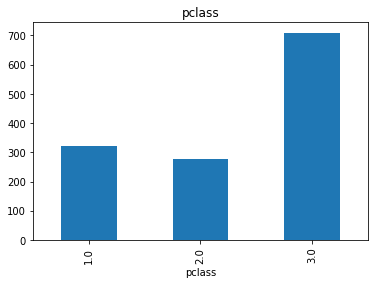

In [77]:
df.groupby('pclass')['index'].count().plot.bar(stacked=True)
plt.title('pclass')

Text(0.5, 1.0, 'sex')

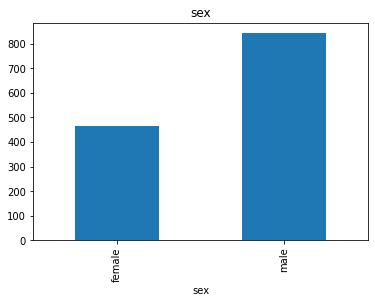

In [78]:
df.groupby('sex')['index'].count().plot.bar(stacked=True)
plt.title('sex')

Text(0.5, 1.0, 'embarked')

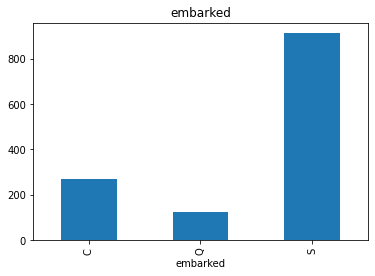

In [79]:
df.groupby('embarked')['index'].count().plot.bar(stacked=True)
plt.title('embarked')

Text(0.5, 1.0, 'age')

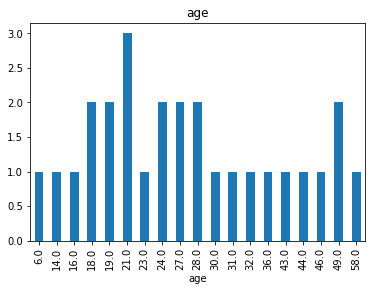

In [80]:
df.head(30).groupby('age')['index'].count().plot.bar(stacked=True)
plt.title('age')

Text(0.5, 1.0, 'fare')

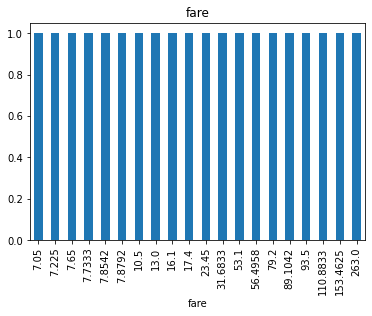

In [81]:
df.head(20).groupby('fare')['index'].count().plot.bar(stacked=True)
plt.title('fare')

Text(0.5, 1.0, 'sibsp')

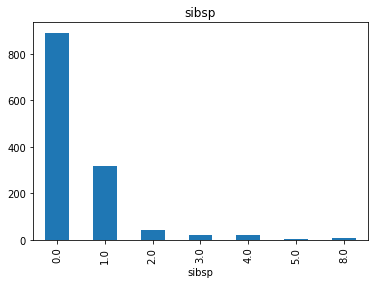

In [82]:
df.groupby('sibsp')['index'].count().plot.bar(stacked=True)
plt.title('sibsp')

Text(0.5, 1.0, 'parch')

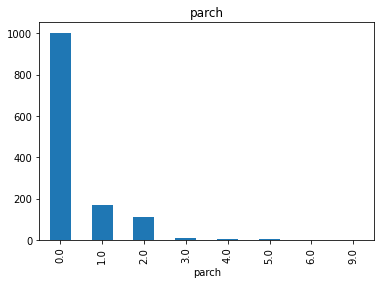

In [83]:
df.groupby('parch')['index'].count().plot.bar(stacked=True)
plt.title('parch')

3. Visualisasikan distribusi dari tiap fitur, dengan data dibagi tiap unique values fitur survived

        total  survived  notSurvived
pclass                              
1.0       323       200          123
2.0       277       119          158
3.0       709       181          528


<AxesSubplot:xlabel='pclass'>

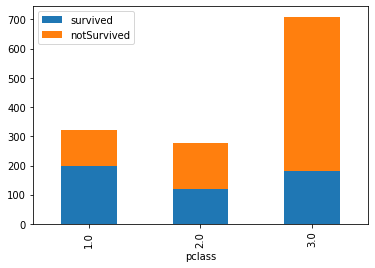

In [84]:
total = df.groupby('pclass')['index'].count()
survived = df[df['survived']==1].groupby('pclass')['index'].count()
notSurvived = df[df['survived']==0].groupby('pclass')['index'].count()
dt = pd.concat([total, survived,notSurvived], axis=1, sort=True)
dt.fillna(0,inplace=True)
dt.columns=['total','survived','notSurvived']
dt = dt.astype('int64')
print(dt)
dt.loc[:,['survived','notSurvived']].plot.bar(stacked=True)

        total  survived  notSurvived
sex                                 
female    466       339          127
male      843       161          682


<AxesSubplot:xlabel='sex'>

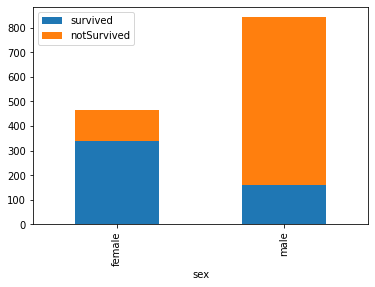

In [85]:
total = df.groupby('sex')['index'].count()
survived = df[df['survived']==1].groupby('sex')['index'].count()
notSurvived = df[df['survived']==0].groupby('sex')['index'].count()
dt = pd.concat([total, survived,notSurvived], axis=1, sort=True)
dt.fillna(0,inplace=True)
dt.columns=['total','survived','notSurvived']
dt = dt.astype('int64')
print(dt)
dt.loc[:,['survived','notSurvived']].plot.bar(stacked=True)

         total  survived  notSurvived
age                                  
0.1667       1         1            0
0.3333       1         0            1
0.4167       1         1            0
0.6667       1         1            0
0.7500       3         2            1
...        ...       ...          ...
70.5000      1         0            1
71.0000      2         0            2
74.0000      1         0            1
76.0000      1         1            0
80.0000      1         1            0

[98 rows x 3 columns]


<AxesSubplot:xlabel='age'>

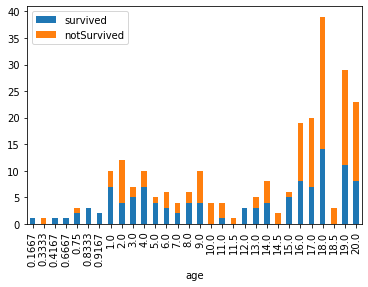

In [86]:
total = df.groupby('age')['index'].count()
survived = df[df['survived']==1].groupby('age')['index'].count()
notSurvived = df[df['survived']==0].groupby('age')['index'].count()
dt = pd.concat([total, survived,notSurvived], axis=1, sort=True)
dt.fillna(0,inplace=True)
dt.columns=['total','survived','notSurvived']
dt = dt.astype('int64')
print(dt)
dt.head(30).loc[:,['survived','notSurvived']].plot.bar(stacked=True)

          total  survived  notSurvived
fare                                  
0.0000       17         2           15
3.1708        1         1            0
4.0125        1         0            1
5.0000        1         0            1
6.2375        1         0            1
...         ...       ...          ...
227.5250      5         3            2
247.5208      3         2            1
262.3750      7         6            1
263.0000      6         4            2
512.3292      4         4            0

[281 rows x 3 columns]


<AxesSubplot:xlabel='fare'>

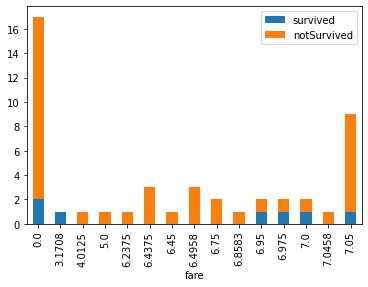

In [87]:
total = df.groupby('fare')['index'].count()
survived = df[df['survived']==1].groupby('fare')['index'].count()
notSurvived = df[df['survived']==0].groupby('fare')['index'].count()
dt = pd.concat([total, survived,notSurvived], axis=1, sort=True)
dt.fillna(0,inplace=True)
dt.columns=['total','survived','notSurvived']
dt = dt.astype('int64')
print(dt)
dt.head(15).loc[:,['survived','notSurvived']].plot.bar(stacked=True)

       total  survived  notSurvived
sibsp                              
0.0      891       309          582
1.0      319       163          156
2.0       42        19           23
3.0       20         6           14
4.0       22         3           19
5.0        6         0            6
8.0        9         0            9


<AxesSubplot:xlabel='sibsp'>

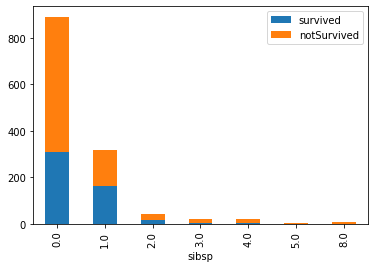

In [88]:
total = df.groupby('sibsp')['index'].count()
survived = df[df['survived']==1].groupby('sibsp')['index'].count()
notSurvived = df[df['survived']==0].groupby('sibsp')['index'].count()
dt = pd.concat([total, survived,notSurvived], axis=1, sort=True)
dt.fillna(0,inplace=True)
dt.columns=['total','survived','notSurvived']
dt = dt.astype('int64')
print(dt)
dt.loc[:,['survived','notSurvived']].plot.bar(stacked=True)

       total  survived  notSurvived
sibsp                              
0.0      891       309          582
1.0      319       163          156
2.0       42        19           23
3.0       20         6           14
4.0       22         3           19
5.0        6         0            6
8.0        9         0            9


<AxesSubplot:xlabel='sibsp'>

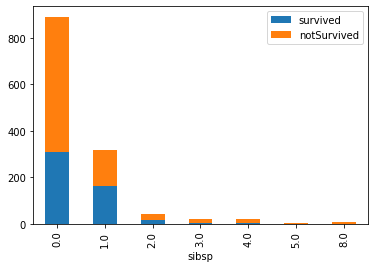

In [89]:
total = df.groupby('sibsp')['index'].count()
survived = df[df['survived']==1].groupby('sibsp')['index'].count()
notSurvived = df[df['survived']==0].groupby('sibsp')['index'].count()
dt = pd.concat([total, survived,notSurvived], axis=1, sort=True)
dt.fillna(0,inplace=True)
dt.columns=['total','survived','notSurvived']
dt = dt.astype('int64')
print(dt)
dt.loc[:,['survived','notSurvived']].plot.bar(stacked=True)

## I.4
Lakukanlah analisa pada data lebih lanjut jika dibutuhkan, kemudian lakukanlah:
1. Penambahan fitur jika memungkinkan
2. Pembuangan fitur yang menurut kalian tidak dibutuhkan
3. Penanganan missing values
4. Transformasi data kategorikal menjadi numerikal (encoding), dengan metode yang kalian inginkan
5. Lakukan scaling dengan MinMaxScaler

In [90]:
# I.4 Put your code here

data = {}

# Karena sebutan honorifik menandai status, maka dapat dijadikan fitur
title_count = {}

use_columns = ['pclass', 'title', 'last_name', 'sex', 'age', 'sibsp', 'parch', 'ticket_code', 'fare', 'embarked', 'survived']

for col in use_columns:
    data[col] = []
    
# investigasi fitur tambahan
for value in df.iloc:
    name = value['name']
    ticket = value['ticket']
    
    # memproses title dan last name
    commaIdx = name.find(", ")
    dotIdx = name.find(". ", commaIdx)
    title = name[commaIdx+2:dotIdx]
    last_name = name[:commaIdx]
    if (title not in title_count):
        title_count[title] = 1
    else:
        title_count[title] += 1
    
    # memproses tiket
    ticket_sep = ticket[::-1].find(" ")
    if (ticket_sep != -1):
        ticket_sep = len(ticket)-ticket_sep
        ticket_code = ticket[:ticket_sep].replace(".", "").replace(" ", "")
    else:
        if (ticket == "LINE"):
            ticket_code = "LINE"
        else:
            ticket_code = "-" # reserve label 0
    
    data['pclass'].append(value['pclass'])
    data['title'].append(title)
    data['last_name'].append(last_name)
    data['sex'].append(value['sex'])
    data['age'].append(value['age'])
    data['sibsp'].append(value['sibsp'])
    data['parch'].append(value['parch'])
    data['ticket_code'].append(ticket_code)
    data['fare'].append(value['fare'])
    data['embarked'].append(value['embarked'])
    data['survived'].append(value['survived'])

# Data understanding kolom title count
print("Title count:")
for title in title_count:
    print("• "+title+": "+str(title_count[title]))

# Untuk memudahkan, beberapa sebutan digabung, terutama yang frekuensiya jarang dalam dataset
# selebihnya, sebutan wanita dapat digabung menjadi Mrs dan Miss, sesuai
# https://newrepublic.com/article/119432/history-female-titles-mistress-miss-mrs-or-ms
titles_map = {'Miss': 'Miss', 'Mrs': 'Mrs', 'Mr': 'Mr', 'Master': 'Master', 'Dr': 'Other', 'Rev': 'Other', 'Don': 'Other', 'Col': 'Army', 'Mme': 'Mrs', 'Capt': 'Army', 'Sir': 'Other', 'Ms': 'Mrs', 'the Countess': 'Nobility', 'Dona': 'Other', 'Mlle': 'Miss', 'Major': 'Army', 'Lady': 'Nobility', 'Jonkheer': 'Other'}

for i, title in enumerate(data['title']):
    data['title'][i] = titles_map[title]

print("\nDataset dengan fitur ditambahkan/dihilangkan:")
new_df = pd.DataFrame(data)
print(new_df)

# Penanganan missing values
new_df.describe()

new_df['age'] = new_df['age'].fillna(new_df['age'].mean())
# for each passanger class, fill missing fare as average fare of each passanger class
for pclass in new_df['pclass'].unique():
    avg_fare_of_pclass = new_df[(new_df['pclass'] == pclass)][['fare']].mean()[0]
    new_df.loc[(new_df['pclass'] == pclass), 'fare'] = new_df[(new_df['pclass'] == pclass)][['fare']].fillna(avg_fare_of_pclass)

new_df['embarked'] = new_df['embarked'].fillna(new_df['embarked'].mode()[0])


# Validasi tidak ada missing value
print("\nJumlah missing value:")
for column in new_df.columns[1:]:
    if (column != "survived"):
        print("• "+column+str(": ")+str(len(new_df[new_df[column].isna()])))
        

# Label encoding
use_df = new_df.copy()

le = LabelEncoder()
classes = {}
for column in use_df.columns:
    le.fit(use_df[column])
    use_df[column] = le.transform(use_df[column])
    classes[column] = le.classes_

print("\nHasil encoding:\n")
print(use_df[['title', 'last_name', 'sex', 'ticket_code', 'embarked']])

# Scaling
scaler = MinMaxScaler()
use_df[['pclass', 'title', 'last_name', 'sex', 'age', 'sibsp', 'parch', 'ticket_code', 'fare', 'embarked']] = scaler.fit_transform(use_df[['pclass', 'title', 'last_name', 'sex', 'age', 'sibsp', 'parch', 'ticket_code', 'fare', 'embarked']])

print("\nHasil scaling:\n")
print(use_df[['pclass', 'title', 'last_name', 'sex', 'age', 'sibsp', 'parch', 'ticket_code', 'fare', 'embarked']])

Title count:
• Miss: 260
• Mrs: 197
• Mr: 757
• Master: 61
• Dr: 8
• Rev: 8
• Don: 1
• Col: 4
• Mme: 1
• Capt: 1
• Sir: 1
• Ms: 2
• the Countess: 1
• Dona: 1
• Mlle: 2
• Major: 2
• Lady: 1
• Jonkheer: 1

Dataset dengan fitur ditambahkan/dihilangkan:
      pclass title             last_name     sex   age  sibsp  parch  \
0        3.0  Miss              Abelseth  female  16.0    0.0    0.0   
1        3.0  Miss                 Burns  female  18.0    0.0    0.0   
2        1.0  Miss               Fortune  female  24.0    3.0    2.0   
3        3.0   Mrs        de Messemaeker  female  36.0    1.0    0.0   
4        3.0    Mr               Jonsson    male  27.0    0.0    0.0   
...      ...   ...                   ...     ...   ...    ...    ...   
1304     3.0    Mr                  Dahl    male  45.0    0.0    0.0   
1305     1.0    Mr  Penasco y Castellana    male  18.0    1.0    0.0   
1306     2.0  Miss                Becker  female  12.0    2.0    1.0   
1307     3.0  Miss            

# II. Experiments Design
Tujuan dari bagian ini adalah peserta dapat memahami cara melakukan eksperimen mencari metode terbaik dengan benar. Hal ini meliputi:
1. Pembuatan model
2. Proses validasi
3. Hyperparameter tuning

## II.1
Tentukanlah metrics yang akan digunakan pada eksperimen kali ini (dapat lebih dari 1 metric)

Metrics yang akan digunakan yaitu classification metrics.

    - Accuracy Score
    - Precision Score
    - Recall Score
    - F1-score

## II.2 
Bagi data dengan perbandingan 0.8 untuk data train dan 0.2 untuk data validasi

In [91]:
X = use_df.loc[:, use_df.columns!='survived']
Y = use_df['survived']

In [92]:
X

,pclass,title,last_name,sex,age,sibsp,parch,ticket_code,fare,embarked
0,1.0,0.333333,0.002288,0.0,0.244898,0.000000,0.000000,0.00,0.103203,1.0
1,1.0,0.333333,0.124714,0.0,0.265306,0.000000,0.000000,0.00,0.167260,0.5
2,0.0,0.333333,0.294050,0.0,0.367347,0.500000,0.285714,0.00,0.996441,1.0
3,1.0,0.666667,0.994279,0.0,0.561224,0.166667,0.000000,0.00,0.466192,1.0
4,1.0,0.500000,0.441648,1.0,0.418367,0.000000,0.000000,0.00,0.160142,1.0
...,...,...,...,...,...,...,...,...,...,...
1304,1.0,0.500000,0.211670,1.0,0.683673,0.000000,0.000000,0.00,0.185053,1.0
1305,0.0,0.500000,0.717391,1.0,0.265306,0.166667,0.000000,0.45,0.932384,0.0
1306,0.5,0.333333,0.075515,0.0,0.193878,0.333333,0.142857,0.00,0.708185,1.0
1307,1.0,0.333333,0.629291,0.0,0.459184,0.166667,0.000000,0.00,0.430605,0.5


In [93]:
Y

0       1
1       0
2       1
3       1
4       0
       ..
1304    1
1305    0
1306    1
1307    1
1308    0
Name: survived, Length: 1309, dtype: int64

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [95]:
X_train

,pclass,title,last_name,sex,age,sibsp,parch,ticket_code,fare,embarked
58,1.0,0.333333,0.358124,0.0,0.459184,0.000000,0.000000,0.950,0.088968,1.0
664,1.0,0.500000,0.909611,1.0,0.479592,0.000000,0.000000,0.000,0.185053,1.0
601,1.0,0.500000,0.348970,1.0,0.428571,0.166667,0.000000,0.875,0.448399,1.0
469,1.0,0.500000,0.331808,1.0,0.520408,0.166667,0.142857,0.000,0.501779,1.0
862,1.0,0.500000,0.434783,1.0,0.448980,0.000000,0.000000,0.000,0.160142,1.0
...,...,...,...,...,...,...,...,...,...,...
230,0.0,0.500000,0.099542,1.0,0.653061,0.000000,0.000000,0.000,0.587189,1.0
224,1.0,0.500000,0.037757,1.0,0.622449,0.166667,0.714286,0.000,0.651246,1.0
552,0.5,0.333333,0.489703,0.0,0.091837,0.166667,0.285714,0.650,0.725979,0.0
567,0.0,0.666667,0.164760,0.0,0.459184,0.000000,0.142857,0.000,0.779359,1.0


In [96]:
X_test

,pclass,title,last_name,sex,age,sibsp,parch,ticket_code,fare,embarked
1250,1.0,0.333333,0.869565,0.0,0.346939,0.000000,0.000000,0.250,0.088968,1.0
849,1.0,0.166667,0.334096,1.0,0.071429,0.833333,0.285714,0.250,0.740214,1.0
452,1.0,0.333333,0.248284,0.0,0.469388,0.000000,0.000000,0.000,0.338078,1.0
474,0.0,0.333333,0.218535,0.0,0.520408,0.000000,0.000000,0.000,0.964413,1.0
576,1.0,0.333333,0.334096,0.0,0.244898,0.833333,0.285714,0.250,0.740214,1.0
...,...,...,...,...,...,...,...,...,...,...
143,0.5,0.666667,0.169336,0.0,0.683673,0.000000,0.285714,0.000,0.629893,1.0
188,0.5,0.666667,0.450801,0.0,0.326531,0.000000,0.000000,0.325,0.508897,1.0
761,0.5,0.500000,0.249428,1.0,0.785714,0.000000,0.000000,0.000,0.569395,1.0
438,0.0,1.000000,0.298627,1.0,0.744898,0.333333,0.000000,0.450,0.946619,1.0


In [97]:
Y_train

58     0
664    0
601    0
469    0
862    0
      ..
230    0
224    0
552    1
567    1
514    0
Name: survived, Length: 1047, dtype: int64

In [98]:
Y_test

1250    1
849     0
452     1
474     1
576     0
       ..
143     1
188     0
761     0
438     1
388     1
Name: survived, Length: 262, dtype: int64

## II.3
Lakukanlah:
1. Prediksi dengan menggunakan model Logistic Regression sebagai *baseline*

In [99]:
logreg = LogisticRegression().fit(X_train, Y_train)
prediction = logreg.predict(X_test)
print("Hasil prediksi dengan Logistic Regression: ")
print(list(prediction))
print()
print("Hasil aktual dari dataset: ")
print(list(Y_test))

Hasil prediksi dengan Logistic Regression: 
[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]

Hasil aktual dari dataset: 
[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1

2. Tampilkan evaluasi dari model yang dibangun dari metrics yang anda tentukan pada II.1

In [100]:
print("Classification report dari hasil prediksi : ")
print(classification_report(Y_test, prediction))
print()
print("Dapat dilihat bahwa,")
print("Nilai dari precision hasil prediksi :", precision_score(Y_test, prediction))
print("Nilai dari recall hasil prediksi :", recall_score(Y_test, prediction))
print("Nilai dari f1 score hasil prediksi :", f1_score(Y_test, prediction))
print("Dengan accuracy hasil prediksi :",accuracy_score(Y_test, prediction))

Classification report dari hasil prediksi : 
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       160
           1       0.70      0.72      0.71       102

    accuracy                           0.77       262
   macro avg       0.76      0.76      0.76       262
weighted avg       0.77      0.77      0.77       262


Dapat dilihat bahwa,
Nilai dari precision hasil prediksi : 0.7019230769230769
Nilai dari recall hasil prediksi : 0.7156862745098039
Nilai dari f1 score hasil prediksi : 0.7087378640776699
Dengan accuracy hasil prediksi : 0.7709923664122137


3. Tampilkan confusion matrix

In [101]:
print("Confusion Matrix dari hasil prediksi : ")
print(confusion_matrix(Y_test, prediction))

Confusion Matrix dari hasil prediksi : 
[[129  31]
 [ 29  73]]


## II.4 
Lakukanlah:
1. Pembelajaran dengan model lain
2. Hyperparameter tuning model yang kalian pakai dengan menggunakan Grid Search (perhatikan random factor pada beberapa algoritma model)
3. Lakukan validasi dengan menggunakan cross validation


In [122]:
# II.4 Put your code here

# Pembelajaran dengan Support Vector Machine
svc = SVC().fit(X_train, Y_train)
prediction = svc.predict(X_test)
print("Hasil prediksi dengan Logistic Regression: ")
print(list(prediction))
print()
print("Hasil aktual dari dataset: ")
print(list(Y_test))
print()
print("Classification report dari hasil prediksi : ")
print(classification_report(Y_test, prediction))
print()
print("Dapat dilihat bahwa,")
print("Nilai dari precision hasil prediksi :", precision_score(Y_test, prediction))
print("Nilai dari recall hasil prediksi :", recall_score(Y_test, prediction))
print("Nilai dari f1 score hasil prediksi :", f1_score(Y_test, prediction))
print("Dengan accuracy hasil prediksi :",accuracy_score(Y_test, prediction))

Hasil prediksi dengan Logistic Regression: 
[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]

Hasil aktual dari dataset: 
[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1

In [ ]:
# Grid Search, variable kernel (sigmoid/poly/rbf) dan nilai penalty C (0.1-1.9)
parameters = {'kernel':('sigmoid', 'poly', 'rbf'), 'C':np.array(range(1, 20, 2))/10}
svc_tuned = GridSearchCV(SVC(), parameters)
svc_tuned.fit(X_train, Y_train)
best_params = svc_tuned.best_params_

print("\nBest params:")
print("• kernel: "+str(best_params['kernel']))
print("• C\t: "+str(best_params['C']))

print("\nScore: "+str(svc_tuned.score(X_test, Y_test)))

# Cross validation
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
cv_scores = cross_validate(svc_tuned, X, Y, cv=cv, scoring=['precision', 'recall', 'f1', 'accuracy'])

print("\nCross validation result:\n")
print("• Mean precision: "+str(np.mean(cv_scores['test_precision'])))
print("• Mean recall\t: "+str(np.mean(cv_scores['test_recall'])))
print("• Mean f1\t: "+str(np.mean(cv_scores['test_f1'])))
print("• Mean accuracy\t: "+str(np.mean(cv_scores['test_accuracy'])))

# III. Improvement
Terdapat beberapa metode untuk melakukan peningkatan performa, contohnya adalah:
1. Melakukan oversampling / undersampling pada data
2. Menggabungkan beberapa model 

Pada bagian ini, kalian diharapkan dapat:
1. Melakukan training dengan data hasil oversampling / undersampling dan melakukan validasi dengan benar
2. Memahami beberapa metode untuk menggabungkan beberapa model

## III.1
Lakukanlah:
1. Oversampling pada kelas minoritas pada data train, kemudian train dengan model *baseline* (II.3), lakukan validasi dengan data validasi. Data train dan validasi adalah data yang kalian bagi pada bagian II.2

Data train dataset :
0    649
1    398
Name: survived, dtype: int64


<AxesSubplot:ylabel='survived'>

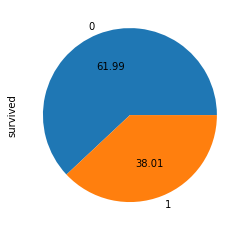

In [113]:
print("Data train dataset :")
print(Y_train.value_counts())
Y_train.value_counts().plot.pie(autopct='%.2f')

Data train setelah oversampling :
0    649
1    649
Name: survived, dtype: int64


<AxesSubplot:ylabel='survived'>

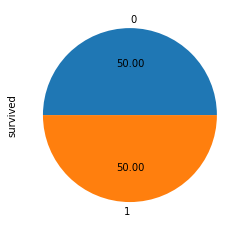

In [114]:
print("Data train setelah oversampling :")
ros = RandomOverSampler(sampling_strategy="not majority") # String
over_X_train, over_Y_train = ros.fit_resample(X_train, Y_train)

print(over_Y_train.value_counts())
over_Y_train.value_counts().plot.pie(autopct='%.2f')

In [115]:
logreg = LogisticRegression().fit(over_X_train, over_Y_train)
prediction = logreg.predict(X_test)
print("Hasil prediksi dengan Logistic Regression: ")
print(list(prediction))
print()
print("Hasil aktual dari dataset: ")
print(list(Y_test))

Hasil prediksi dengan Logistic Regression: 
[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]

Hasil aktual dari dataset: 
[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1

In [116]:
print("Classification report dari hasil prediksi : ")
print(classification_report(Y_test, prediction))
print()
print("Dapat dilihat bahwa,")
print("Nilai dari precision hasil prediksi :", precision_score(Y_test, prediction))
print("Nilai dari recall hasil prediksi :", recall_score(Y_test, prediction))
print("Nilai dari f1 score hasil prediksi :", f1_score(Y_test, prediction))
print("Dengan accuracy hasil prediksi :",accuracy_score(Y_test, prediction))

Classification report dari hasil prediksi : 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       160
           1       0.68      0.74      0.71       102

    accuracy                           0.76       262
   macro avg       0.75      0.76      0.75       262
weighted avg       0.77      0.76      0.76       262


Dapat dilihat bahwa,
Nilai dari precision hasil prediksi : 0.6818181818181818
Nilai dari recall hasil prediksi : 0.7352941176470589
Nilai dari f1 score hasil prediksi : 0.7075471698113208
Dengan accuracy hasil prediksi : 0.7633587786259542


2. Undersampling pada kelas mayoritas pada data train, kemudian train dengan model *baseline* (II.3) lakukan validasi dengan data validasi. Data train dan validasi adalah data yang kalian bagi pada bagian II.2

Data train dataset :
0    649
1    398
Name: survived, dtype: int64


<AxesSubplot:ylabel='survived'>

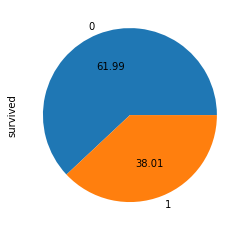

In [117]:
print("Data train dataset :")
print(Y_train.value_counts())
Y_train.value_counts().plot.pie(autopct='%.2f')

Data train setelah oversampling :
0    398
1    398
Name: survived, dtype: int64


<AxesSubplot:ylabel='survived'>

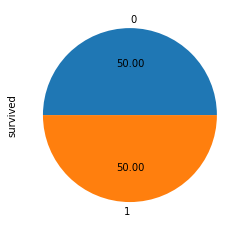

In [118]:
print("Data train setelah oversampling :")
rus = RandomUnderSampler(sampling_strategy=1) # String
under_X_train, under_Y_train = rus.fit_resample(X_train, Y_train)

print(under_Y_train.value_counts())
under_Y_train.value_counts().plot.pie(autopct='%.2f')

In [119]:
logreg = LogisticRegression().fit(under_X_train, under_Y_train)
prediction = logreg.predict(X_test)
print("Hasil prediksi dengan Logistic Regression: ")
print(list(prediction))
print()
print("Hasil aktual dari dataset: ")
print(list(Y_test))

Hasil prediksi dengan Logistic Regression: 
[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]

Hasil aktual dari dataset: 
[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1

In [120]:
print("Classification report dari hasil prediksi : ")
print(classification_report(Y_test, prediction))
print()
print("Dapat dilihat bahwa,")
print("Nilai dari precision hasil prediksi :", precision_score(Y_test, prediction))
print("Nilai dari recall hasil prediksi :", recall_score(Y_test, prediction))
print("Nilai dari f1 score hasil prediksi :", f1_score(Y_test, prediction))
print("Dengan accuracy hasil prediksi :",accuracy_score(Y_test, prediction))

Classification report dari hasil prediksi : 
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       160
           1       0.68      0.75      0.72       102

    accuracy                           0.77       262
   macro avg       0.76      0.76      0.76       262
weighted avg       0.77      0.77      0.77       262


Dapat dilihat bahwa,
Nilai dari precision hasil prediksi : 0.6814159292035398
Nilai dari recall hasil prediksi : 0.7549019607843137
Nilai dari f1 score hasil prediksi : 0.7162790697674417
Dengan accuracy hasil prediksi : 0.767175572519084


## III.2
Lakukanlah:
1. Eksplorasi soft voting, hard voting, dan stacking
2. Buatlah model Logistic Regression dan SVM (boleh menggunakan model dengan beberapa parameter yang berbeda)
3. Lakukanlah soft voting dari model-model yang sudah kalian buat pada poin 2
4. Lakukan hard voting dari model-model yang sudah kalian buat pada poin 2
5. Lakukanlah stacking dengan final classifier adalah Logistic Regression dari model-model yang sudah kalian buat pada poin 2
6. Lakukan validasi dengan metrics yang kalian tentukan untuk poin 3, 4, dan 5

Put your answer for section III.2 point 1 here

In [121]:
# III.2 Put your code here

# IV. Analisis
Bandingkan hasil dari:
1. Model Baseline (II.3)
2. Model lain (II.4)
3. Hasil undersampling
4. Hasil oversampling
5. Hasil soft voting
6. Hasil hard voting
7. Hasil stacking 

Put your answer for section IV here